In [1]:
%matplotlib widget

import torch
import numpy as np
import meshplot as mp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import mpfd_solver as solver
import random


In [4]:


dt = 120.
zN = 40.
tN = random.uniform(360,1800)

psiB = random.uniform(-150,-50)
psiT = random.uniform(-50,-10)

#sink = -0.00001

psiInitial = sorted([random.uniform(psiB,psiB+1) for _ in range(39)])
psiInitial = np.hstack([psiB,psiInitial,psiT])

z,t,dtlast,dz,n,nt,zN,psi,psiB,psiT,pars = solver.setup(dt,tN,zN,psiInitial)




output = solver.ModelRun(dt,dtlast,dz,n,nt,psi,psiB,psiT,pars)


z=np.hstack([0,z,zN])
z=z[-1]-z


In [5]:
output

: 

In [3]:
psiFinal = np.hstack((psiB, output[-1], psiT))


fig,ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(z, psiInitial,linestyle=':',linewidth=2.0)
ax1.plot(z, psiFinal,linestyle=':',linewidth=2.0,color='red')

print(solver.massbal(output,psiT,psiB,pars,n,dt,dz))

: 

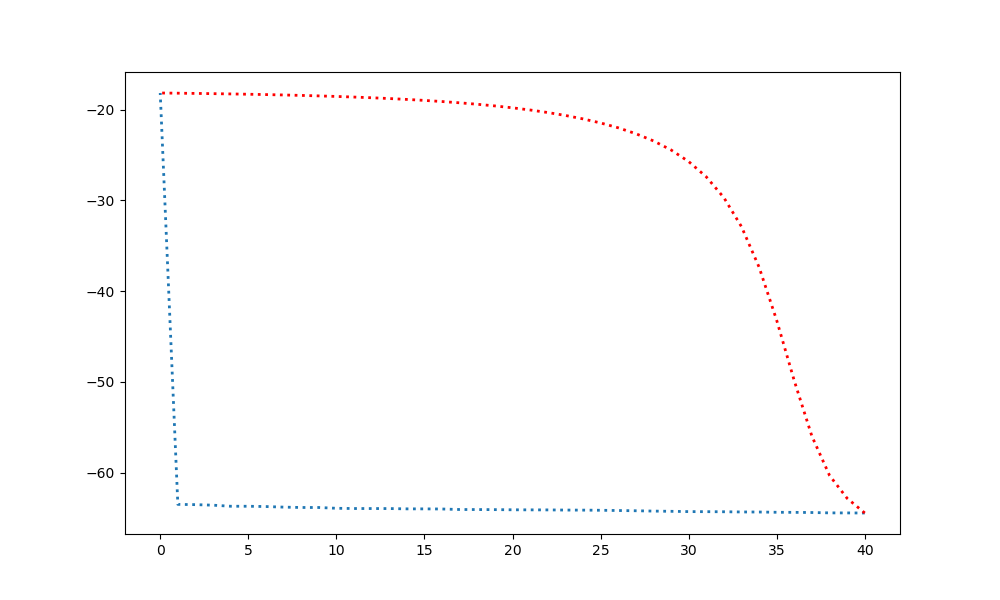

In [15]:




fig,ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(z, psiInitial,linestyle=':',linewidth=2.0)
ax1.plot(z, psiFinal,linestyle=':',linewidth=2.0,color='red')


In [12]:
dt = 30
zN = 40.
tN = 360.
psiB = -61.5
psiT = -20.7

gridpointsN = 41

psiInitial = np.hstack([psiB,np.full(gridpointsN-2,-61.5),psiT])


z,t,dz,n,nt,zN,psi,psiB,psiT,pars=solver.setup(dt,tN,zN,psiInitial)


psi,err = solver.ModelRun(dt,dz,n,nt,psi,psiB,psiT,pars)


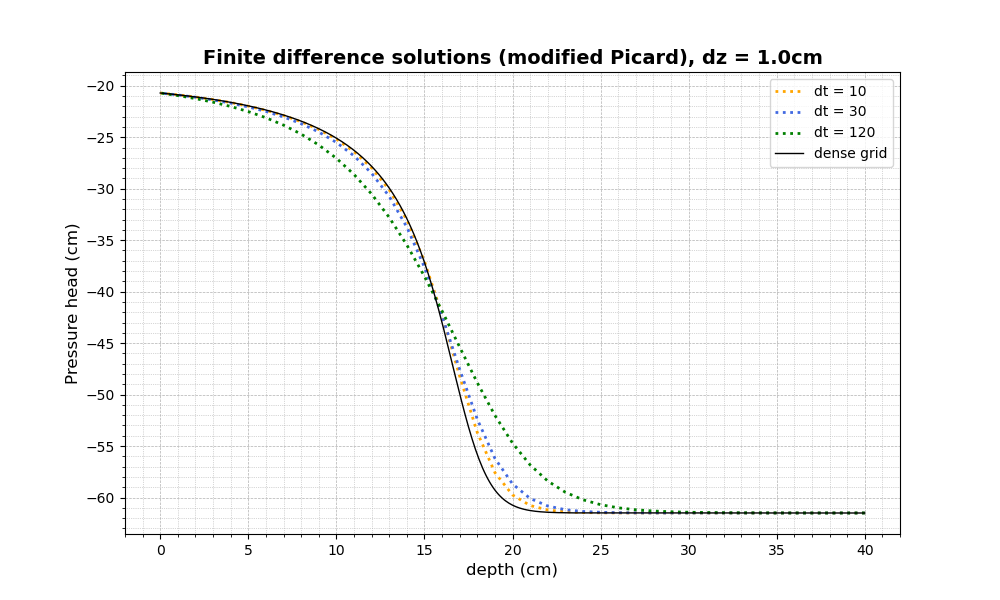

In [4]:
### Plotting visual for thesis ###

# coarser grid, different timescales.

dts = [10,30,120]
zN = 40.
tN = 360.
psiB = -61.5
psiT = -20.7

psiInitial = np.hstack([psiB,np.full(39,-61.5),psiT])




fig,ax1 = plt.subplots(figsize=(10, 6))
colors = ['orange','royalblue','green']

for i in range(len(dts)):
    z,t,dz,n,nt,zN,psi,psiB,psiT,pars=solver.setup(dts[i],tN,zN,psiInitial)
    psi,err = solver.ModelRun(dts[i],dz,n,nt,psi,psiB,psiT,pars)
    #psifinal=np.hstack([psiB,psi[-1].detach().numpy(),psiT])
    psifinal=np.hstack([psiB,psi[-1],psiT])
    z=np.hstack([0,z,zN])
    z=z[-1]-z
    ax1.plot(z, psifinal,label= f"dt = {dts[i]}",color=colors[i],linestyle=':',linewidth=2.0)


ax1.legend(title='')
ax1.set_title("Finite difference solutions (modified Picard), dz = 1.0cm", fontsize=14, fontweight='bold')
ax1.grid(True)
ax1.set_xlabel("depth (cm)", fontsize=12)
ax1.set_ylabel("Pressure head (cm)", fontsize=12)


ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.minorticks_on()
ax1.grid(True, which='minor', linestyle=':', linewidth=0.5)


# dense grid

dt = 1
zN = 40.
tN = 360.

psiInitial = np.hstack([psiB,np.full(399,-61.5),psiT])


z,t,dz,n,nt,zN,psi,psiB,psiT,pars=solver.setup(dt,tN,zN,psiInitial)
psi,err = solver.ModelRun(dt,dz,n,nt,psi,psiB,psiT,pars)

z=np.hstack([0,z,zN])
z=z[-1]-z

#psifinal=np.hstack([psiB,psi[-1].detach().numpy(),psiT])
psifinal=np.hstack([psiB,psi[-1],psiT])


ax1.plot(z, psifinal,label=f"dense grid",color="black",linewidth=1.0)
ax1.legend()

plt.show()

